<a href="https://www.kaggle.com/code/izzulroslan/eda-korean-dramas-dataset?scriptVersionId=231129106" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.kaggle.com/code/izzulroslan/eda-korean-dramas-dataset?scriptVersionId=231129106" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saikalbatyrbekova/korean-dramas-dataset-eda")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/korean-dramas-dataset-eda


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Use the correct path to the downloaded file
file_path = "/kaggle/input/korean-dramas-dataset-eda/kdrama_DATASET.csv"

# Load dataset
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,Rank,Title,Year of release,Number of Episodes,Rating,Description,Genre,Tags,Actors
0,#1,Move to Heaven,2021,10,9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...","Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju..."
1,#2,Twinkling Watermelon,2023,16,9.2,"In 2023, high school student Eun Gyeol, a CODA...","Romance, Youth, Drama, Fantasy","Time Travel, Child From The Future, Sign Langu...","Ha Eun-Gyeol, Ha Yi-Chan, Choi Se-Kyung, Yoon ..."
2,#3,Moving,2023,20,9.1,"Kim Bong Seok, Jang Hui Su, and Lee Gang Hun, ...","Action, Thriller, Mystery, Supernatural","Graphic Violence, Supernatural Power, Multiple...","Ryu Seung Ryong, Han Hyo Joo, Zo In Sung"
3,#4,The Trauma Code: Heroes on Call,2025,8,9.1,"Baek Gang Hyeok, a genius trauma surgeon with ...","Action, Comedy, Drama, Medical","Surgeon Male Lead, Hospital Setting, Mentor-Me...","Ju Ji Hoon, Choo Young Woo, Ha Young, Yoon Gyu..."
4,#5,Flower of Evil,2020,16,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ..."


In [5]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                350 non-null    object 
 1   Title               350 non-null    object 
 2   Year of release     350 non-null    int64  
 3   Number of Episodes  350 non-null    int64  
 4   Rating              350 non-null    float64
 5   Description         350 non-null    object 
 6   Genre               350 non-null    object 
 7   Tags                350 non-null    object 
 8   Actors              350 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 24.7+ KB


Rank                  0
Title                 0
Year of release       0
Number of Episodes    0
Rating                0
Description           0
Genre                 0
Tags                  0
Actors                0
dtype: int64

In [6]:
top_dramas = df.sort_values(by="Rating", ascending=False).head(10)
print(top_dramas[["Title", "Rating", "Year of release"]])


                              Title  Rating  Year of release
0                    Move to Heaven     9.2             2021
1              Twinkling Watermelon     9.2             2023
2                            Moving     9.1             2023
3  The Trauma Code: Heroes on Call      9.1             2025
4                    Flower of Evil     9.1             2020
5                 Hospital Playlist     9.1             2020
6               Hospital Playlist 2     9.1             2021
7                         My Mister     9.1             2018
8                        Reply 1988     9.1             2015
9                 Weak Hero Class 1     9.1             2022


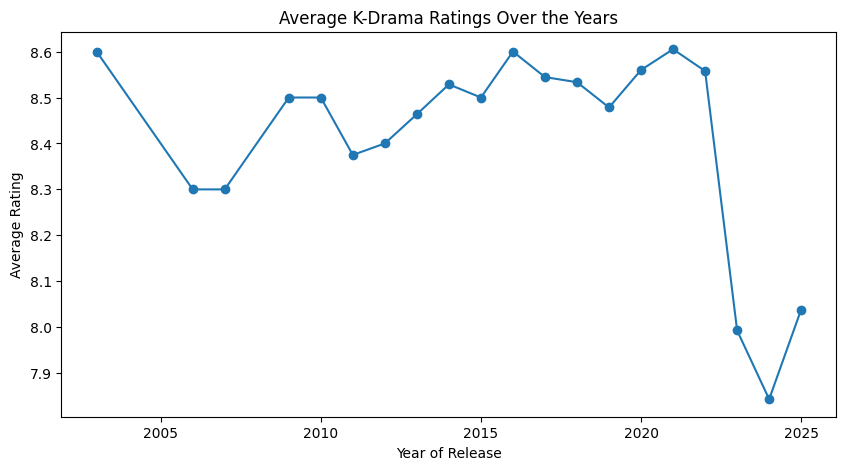

In [7]:
# Group data by year and calculate the average rating
df.groupby("Year of release")["Rating"].mean().plot(kind="line", marker="o", figsize=(10, 5))

plt.title("Average K-Drama Ratings Over the Years")
plt.xlabel("Year of Release")
plt.ylabel("Average Rating")
plt.show()


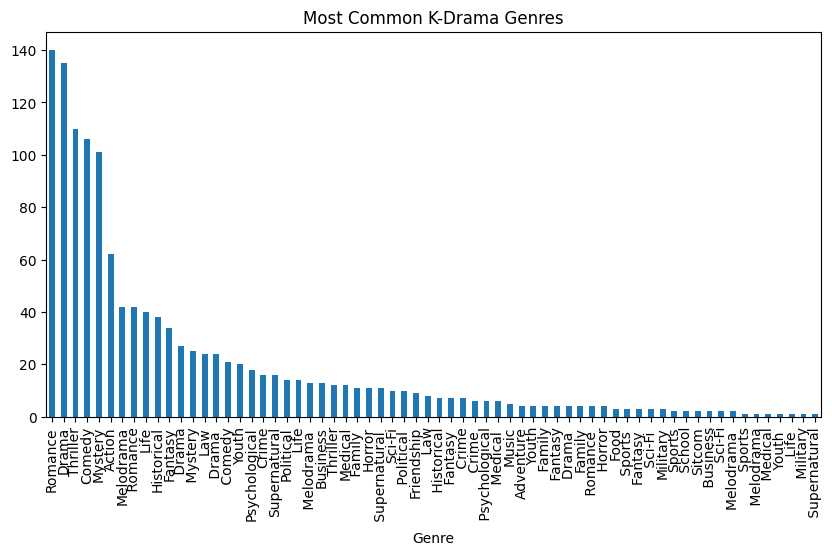

In [8]:
from collections import Counter

genre_list = df["Genre"].dropna().str.split(", ")
flat_list = [genre for sublist in genre_list for genre in sublist]
genre_counts = Counter(flat_list)

# Convert to DataFrame and plot
genre_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values(by="Count", ascending=False)

genre_df.plot(kind="bar", x="Genre", y="Count", figsize=(10, 5), legend=False)
plt.title("Most Common K-Drama Genres")
plt.show()


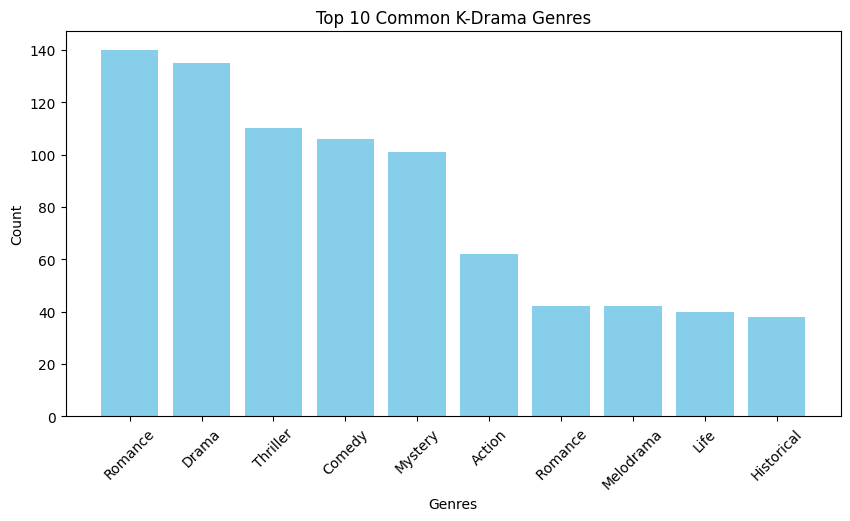

In [9]:
# Convert Counter dictionary to two lists: genres and counts
genres, counts = zip(*genre_counts.most_common(10))  # Top 10 genres

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(genres, counts, color="skyblue")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Top 10 Common K-Drama Genres")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [10]:
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")  # Convert Rating to number

# Explode genre column to handle multiple genres per drama
df_exploded = df.assign(Genre=df["Genre"].str.split(", ")).explode("Genre")

# Calculate average rating per genre
avg_genre_rating = df_exploded.groupby("Genre")["Rating"].mean().sort_values(ascending=False)

print("Top 10 Average Rating by Genre\n", avg_genre_rating.head(10))  # Show top 10 genres


Top 10 Average Rating by Genre
 Genre
 Crime        8.842857
 Family       8.827273
 Youth        8.825000
 Military     8.800000
 Life         8.800000
 Horror       8.800000
Melodrama     8.800000
Friendship    8.788889
Military      8.766667
 Medical      8.766667
Name: Rating, dtype: float64


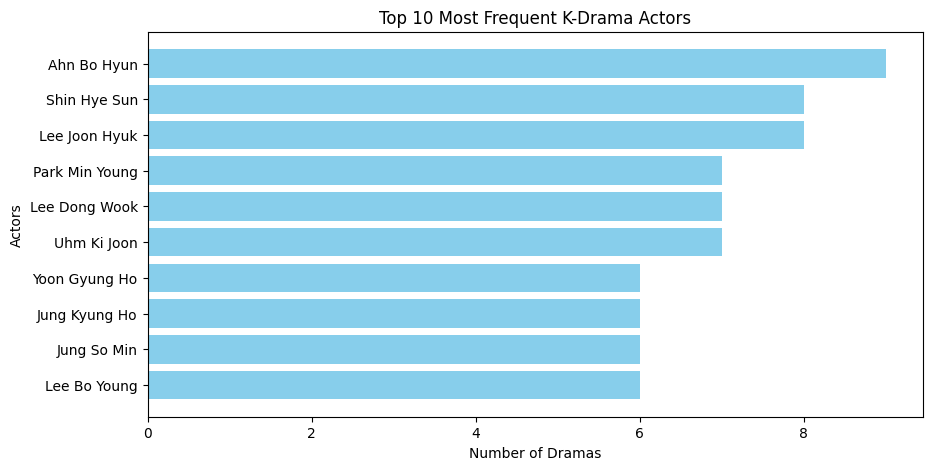

In [11]:
# Explode actors column to handle multiple actors per drama
df_exploded_actors = df.assign(Actors=df["Actors"].str.split(", ")).explode("Actors")

# Count occurrences of each actor
actor_counts = Counter(df_exploded_actors["Actors"])

# Get top 10 most frequent actors
top_actors = actor_counts.most_common(10)

# Convert to two lists for plotting
actors, counts = zip(*top_actors)

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.barh(actors, counts, color="skyblue")
plt.xlabel("Number of Dramas")
plt.ylabel("Actors")
plt.title("Top 10 Most Frequent K-Drama Actors")
plt.gca().invert_yaxis()  # Invert y-axis to show highest count on top
plt.show()


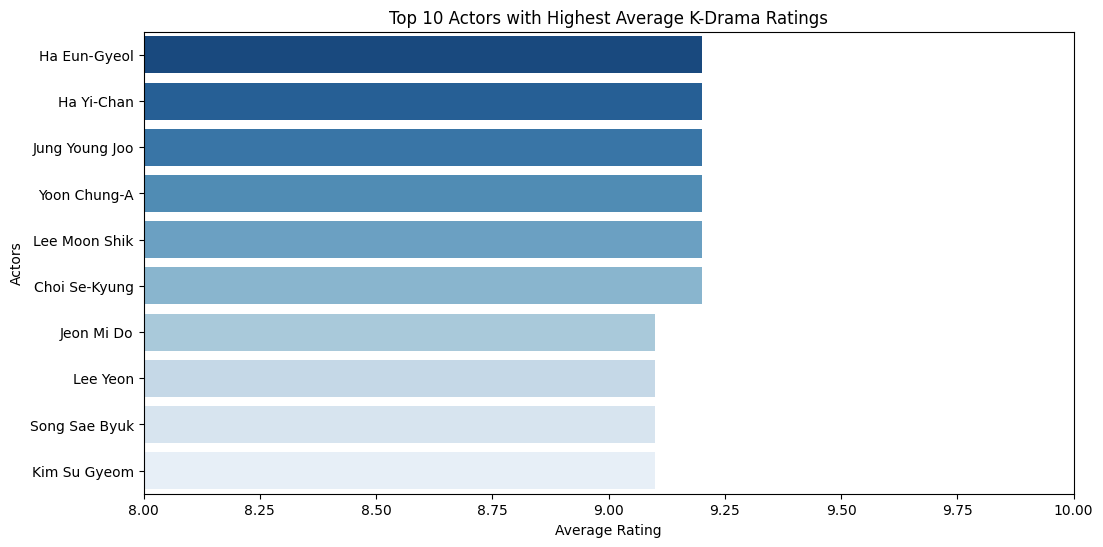

In [12]:
# Explode the "Actors" column to separate multiple actors per drama
df_exploded_actors = df.assign(Actors=df["Actors"].str.split(", ")).explode("Actors")

# Group by actor and calculate average rating
actor_avg_ratings = df_exploded_actors.groupby("Actors")["Rating"].mean().reset_index()

# Sort by highest average rating and get top 10 actors
top_actors = actor_avg_ratings.sort_values(by="Rating", ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(y=top_actors["Actors"], x=top_actors["Rating"], palette="Blues_r")
plt.xlabel("Average Rating")
plt.ylabel("Actors")
plt.title("Top 10 Actors with Highest Average K-Drama Ratings")
plt.xlim(8, 10)  # Adjust scale for better readability
plt.show()


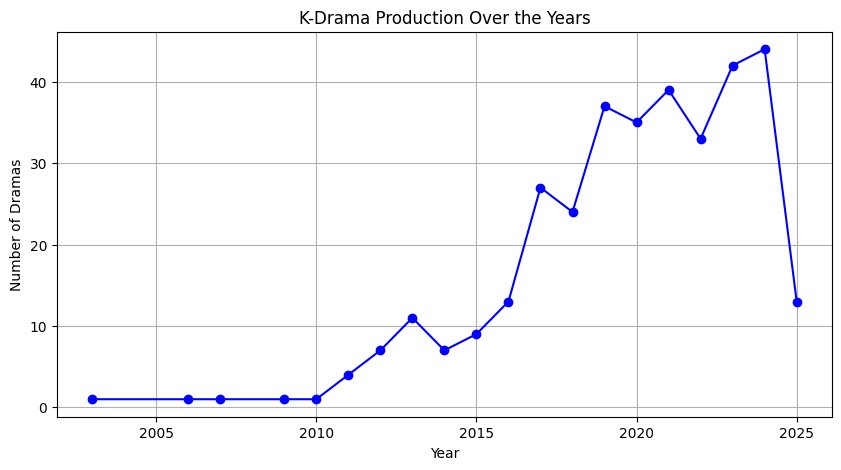

In [13]:
# Count number of dramas per year
drama_per_year = df["Year of release"].value_counts().sort_index()

# Plot trend
plt.figure(figsize=(10, 5))
plt.plot(drama_per_year.index, drama_per_year.values, marker="o", linestyle="-", color="blue")
plt.xlabel("Year")
plt.ylabel("Number of Dramas")
plt.title("K-Drama Production Over the Years")
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


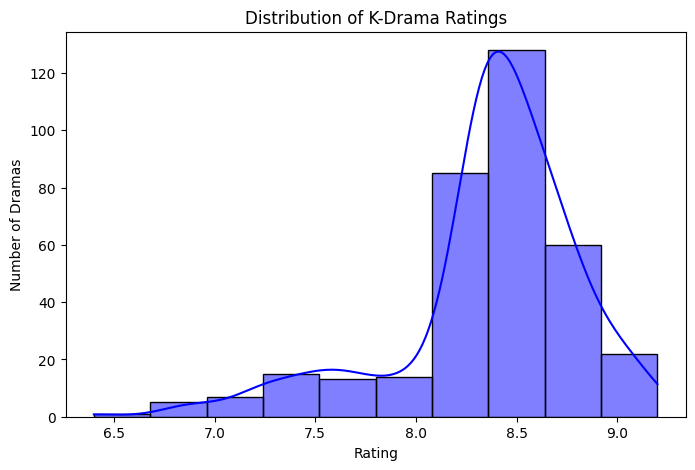

In [14]:
# Plot histogram of ratings
plt.figure(figsize=(8,5))
sns.histplot(df["Rating"], bins=10, kde=True, color="blue")
plt.xlabel("Rating")
plt.ylabel("Number of Dramas")
plt.title("Distribution of K-Drama Ratings")
plt.show()


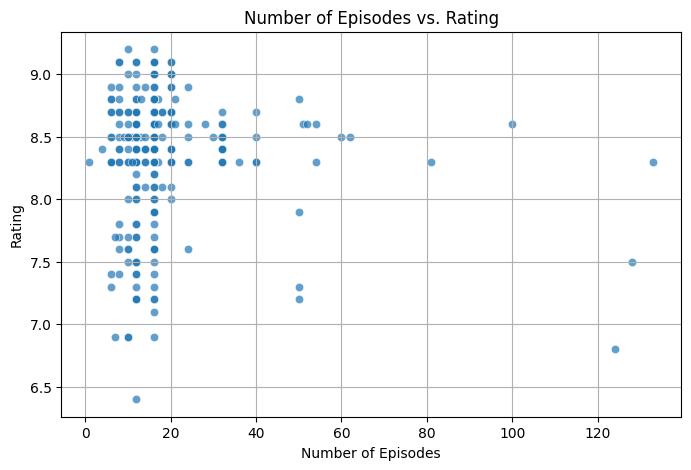

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Number of Episodes"], y=df["Rating"], alpha=0.7)
plt.xlabel("Number of Episodes")
plt.ylabel("Rating")
plt.title("Number of Episodes vs. Rating")
plt.grid()
plt.show()


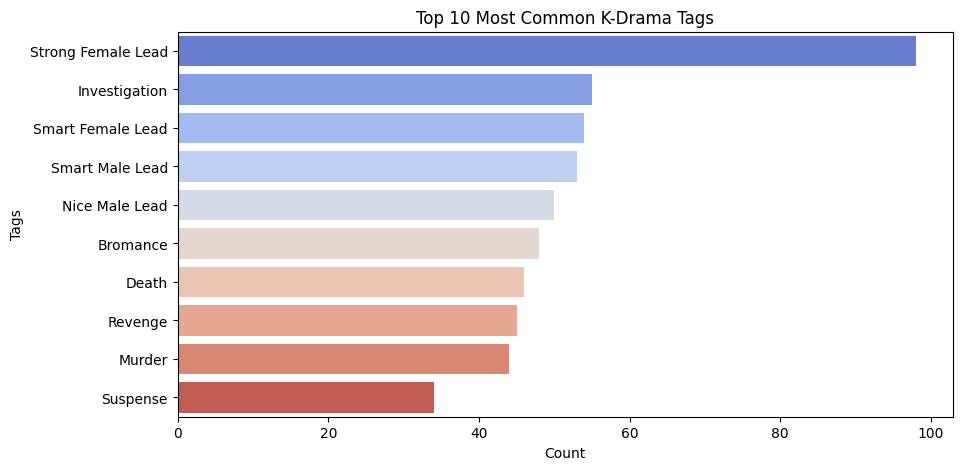

In [16]:
# Explode tags column
df_exploded_tags = df.assign(Tags=df["Tags"].str.split(", ")).explode("Tags")

# Count occurrences
tag_counts = Counter(df_exploded_tags["Tags"])

# Convert to DataFrame
df_tags = pd.DataFrame(tag_counts.most_common(10), columns=["Tag", "Count"])

# Plot bar chart
plt.figure(figsize=(10,5))
sns.barplot(y=df_tags["Tag"], x=df_tags["Count"], palette="coolwarm")
plt.xlabel("Count")
plt.ylabel("Tags")
plt.title("Top 10 Most Common K-Drama Tags")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

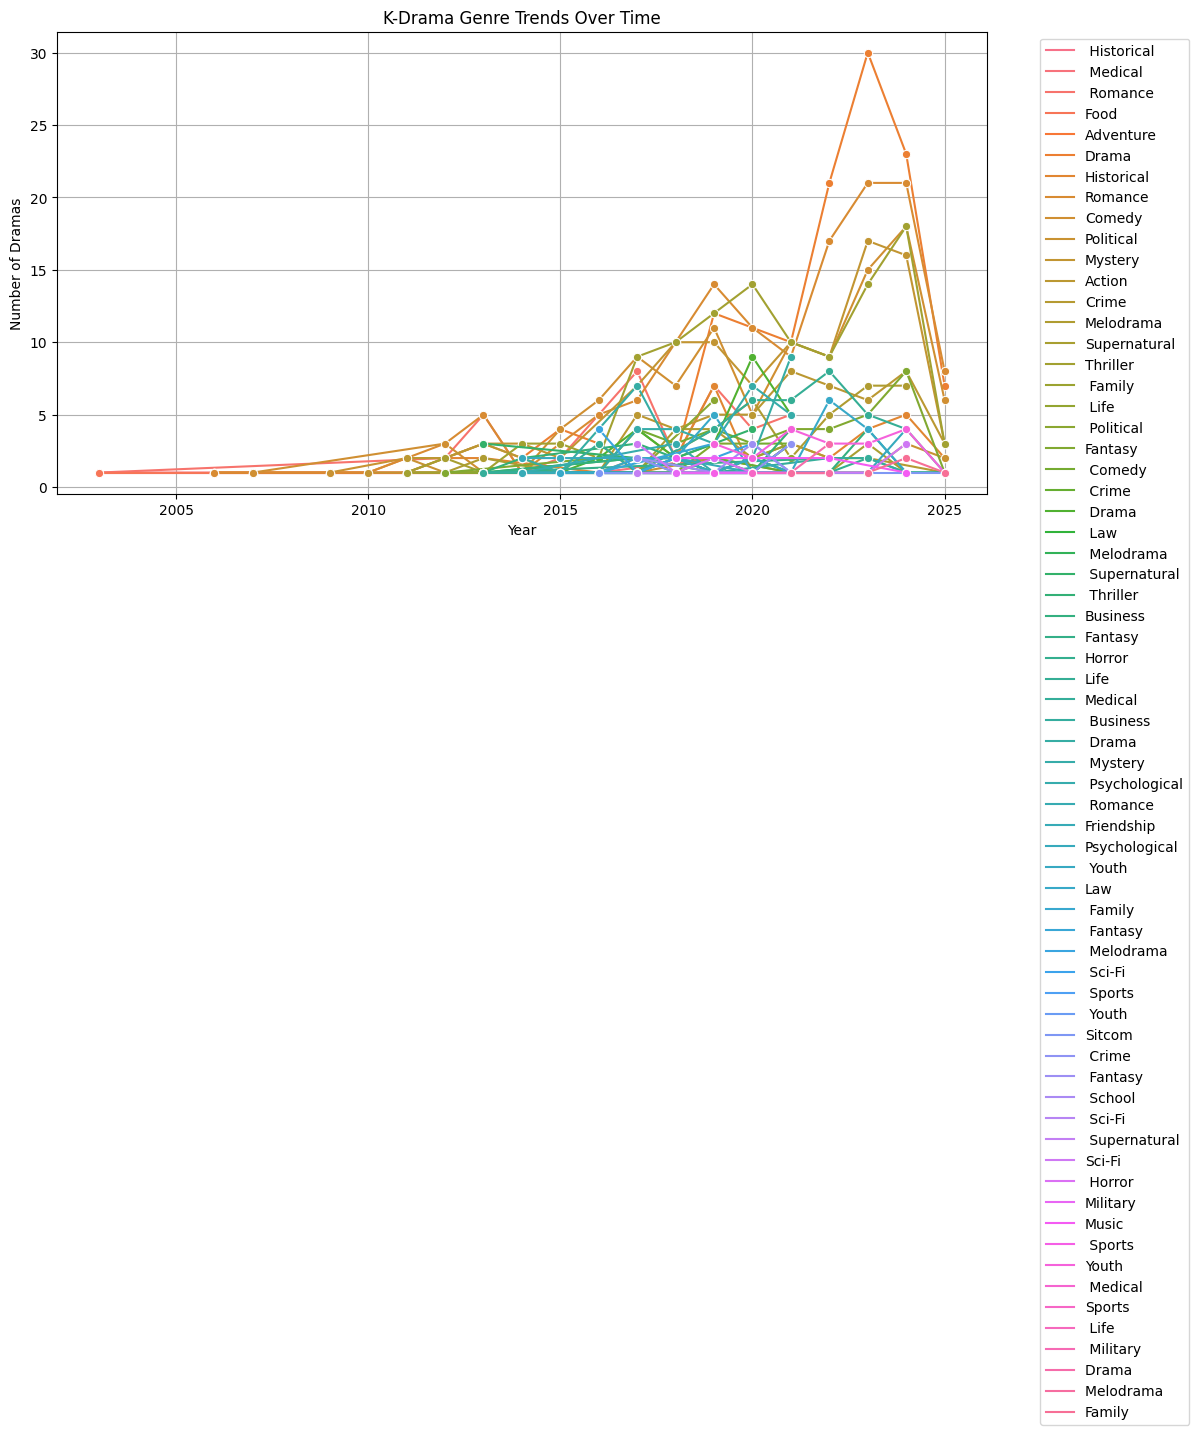

In [17]:
df_exploded_genres = df.assign(Genre=df["Genre"].str.split(", ")).explode("Genre")

# Count number of dramas per genre per year
genre_trend = df_exploded_genres.groupby(["Year of release", "Genre"]).size().reset_index(name="Count")

# Plot trend
plt.figure(figsize=(12,6))
sns.lineplot(data=genre_trend, x="Year of release", y="Count", hue="Genre", marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Dramas")
plt.title("K-Drama Genre Trends Over Time")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid()
plt.show()


In [18]:
print("Key Insights:\n")

# General stats
total_dramas = df.shape[0]
unique_titles = df['Title'].nunique()
average_rating = df['Rating'].mean()
print(f"Total Dramas: {total_dramas}")
print(f"Unique Titles: {unique_titles}")
print(f"Average Rating: {average_rating:.2f}")

# Most common genre
most_common_genre = df['Genre'].str.split(', ').explode().mode()[0]
print(f"Most Popular Genre: {most_common_genre}")

# Highest rated drama
top_drama = df.loc[df['Rating'].idxmax()]
print(f"Highest Rated Drama: {top_drama['Title']} ({top_drama['Rating']})")

# Most frequently appearing actor
most_common_actor = df['Actors'].str.split(', ').explode().mode()[0]
print(f"Most Frequently Appearing Actor: {most_common_actor}")

# Average rating per actor (corrected)
df_exploded = df.assign(Actors=df['Actors'].str.split(', ')).explode('Actors')  # Properly split and explode actors
actor_ratings = df_exploded.groupby('Actors')['Rating'].mean().sort_values(ascending=False)

print("\nTop 5 Actors with Highest Average Ratings:")
print(actor_ratings.head(5))

# Drama length analysis
avg_episodes = df['Number of Episodes'].mean()
longest_drama = df.loc[df['Number of Episodes'].idxmax()]
shortest_drama = df.loc[df['Number of Episodes'].idxmin()]
print(f"\nAverage Number of Episodes per Drama: {avg_episodes:.2f}")
print(f"Longest Drama: {longest_drama['Title']} ({longest_drama['Number of Episodes']} episodes)")
print(f"Shortest Drama: {shortest_drama['Title']} ({shortest_drama['Number of Episodes']} episodes)")

# Most commonly used tags
most_common_tag = df['Tags'].str.split(', ').explode().mode()[0]
print(f"Most Common Tag: {most_common_tag}")

# Year with the most drama releases
most_active_year = df['Year of release'].mode()[0]
dramas_in_active_year = df[df['Year of release'] == most_active_year].shape[0]
print(f"Year with Most Dramas: {most_active_year} ({dramas_in_active_year} dramas released)")

# Correlation between Rating and Number of Episodes
correlation = df[['Rating', 'Number of Episodes']].corr().iloc[0,1]
print(f"Correlation Between Rating and Number of Episodes: {correlation:.2f}")


Key Insights:

Total Dramas: 350
Unique Titles: 350
Average Rating: 8.36
Most Popular Genre: Romance
Highest Rated Drama: Move to Heaven (9.2)
Most Frequently Appearing Actor: Ahn Bo Hyun

Top 5 Actors with Highest Average Ratings:
Actors
Ha Eun-Gyeol      9.2
Ha Yi-Chan        9.2
Jung Young Joo    9.2
Yoon Chung-A      9.2
Lee Moon Shik     9.2
Name: Rating, dtype: float64

Average Number of Episodes per Drama: 18.25
Longest Drama: Ugly Alert (133 episodes)
Shortest Drama: It's Okay, That's Friendship (1 episodes)
Most Common Tag: Strong Female Lead
Year with Most Dramas: 2024 (44 dramas released)
Correlation Between Rating and Number of Episodes: -0.08
